# Machine Learning Engineer Nanodegree
## Capstone Project
## Project: Stock Price Predictor

The challenge of this project is to accurately predict the future closing value of a given stock across a given period of time in the future. For this project I will use a [Long Short Term Memory networks – usually just called “LSTMs”](http://colah.github.io/posts/2015-08-Understanding-LSTMs/) to predict the closing price of the [S&P 500](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) using a dataset of past prices


 **Step 1:** get the data of desired firm from [yfinance](https://sg.finance.yahoo.com).

In [1]:
import yfinance as yf
data = yf.download('GOOGL','2006-01-01','2020-12-31') # from January 1, 2005 to June 30, 2017

[*********************100%***********************]  1 of 1 completed


**Step 3:** Write the data to a csv file.

In [2]:
data.to_csv('google.csv',index = False)

# Check Point #1

This is my first checkpoint. The data has been saved to disk.

## Preprocess the data

Now it is time to preprocess the data. In the following cells we will normalise it for better prediction of data.

**Step 1 :** Get the data from csv file.

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('google.csv')
print(data.head())

print("\n")
print("Open   --- mean :", np.mean(data['Open']),  "  \t Std: ", np.std(data['Open']),  "  \t Max: ", np.max(data['Open']),  "  \t Min: ", np.min(data['Open']))
print("High   --- mean :", np.mean(data['High']),  "  \t Std: ", np.std(data['High']),  "  \t Max: ", np.max(data['High']),  "  \t Min: ", np.min(data['High']))
print("Low    --- mean :", np.mean(data['Low']),   "  \t Std: ", np.std(data['Low']),   "  \t Max: ", np.max(data['Low']),   "  \t Min: ", np.min(data['Low']))
print("Close  --- mean :", np.mean(data['Close']), "  \t Std: ", np.std(data['Close']), "  \t Max: ", np.max(data['Close']), "  \t Min: ", np.min(data['Close']))
print("Volume --- mean :", np.mean(data['Volume']),"  \t Std: ", np.std(data['Volume']),"  \t Max: ", np.max(data['Volume']),"  \t Min: ", np.min(data['Volume']))


         Open        High         Low       Close   Adj Close    Volume
0  211.471466  218.053055  209.319321  217.832840  217.832840  26216158
1  222.172165  224.704712  220.095093  222.842850  222.842850  30542227
2  223.223221  226.001007  220.970978  225.845840  225.845840  21594983
3  228.663666  235.485489  226.846848  233.063065  233.063065  35478286
4  233.438431  236.936935  230.700699  233.683685  233.683685  25558216


Open   --- mean : 595.1854611670892   	 Std:  404.659344519683   	 Max:  1820.5400390625   	 Min:  131.38638305664062
High   --- mean : 600.8108673338227   	 Std:  408.7066359298637   	 Max:  1843.8299560546875   	 Min:  134.81982421875
Low    --- mean : 589.2461429843523   	 Std:  400.8042003921636   	 Max:  1817.0   	 Min:  123.77377319335938
Close  --- mean : 595.1791107662782   	 Std:  404.9480276583226   	 Max:  1824.969970703125   	 Min:  128.84884643554688
Volume --- mean : 5555460.540397351   	 Std:  5995355.040941806   	 Max:  82151167   	 Min:  46560

**Step 2 :** Add item field

In [4]:
import preprocess_data as ppd
stocks = ppd.remove_data(data)

#Print the dataframe head and tail
print(stocks.head())
print("---")
print(stocks.tail())

   Item         Open        Close   Volume         High          Low
0     0  1765.000000  1736.250000  1051300  1767.760010  1728.000000
1     1  1787.229980  1757.760010   986300  1788.469971  1755.109985
2     2  1744.910034  1773.959961  1382500  1787.000000  1741.819946
3     3  1729.000000  1734.160034   465600  1742.410034  1724.349976
4     4  1723.930054  1728.229980  1148700  1744.109985  1721.199951
---
      Item        Open       Close    Volume        High         Low
3770  3770  233.438431  233.683685  25558216  236.936935  230.700699
3771  3771  228.663666  233.063065  35478286  235.485489  226.846848
3772  3772  223.223221  225.845840  21594983  226.001007  220.970978
3773  3773  222.172165  222.842850  30542227  224.704712  220.095093
3774  3774  211.471466  217.832840  26216158  218.053055  209.319321


**Step 3:** Visualise raw data.

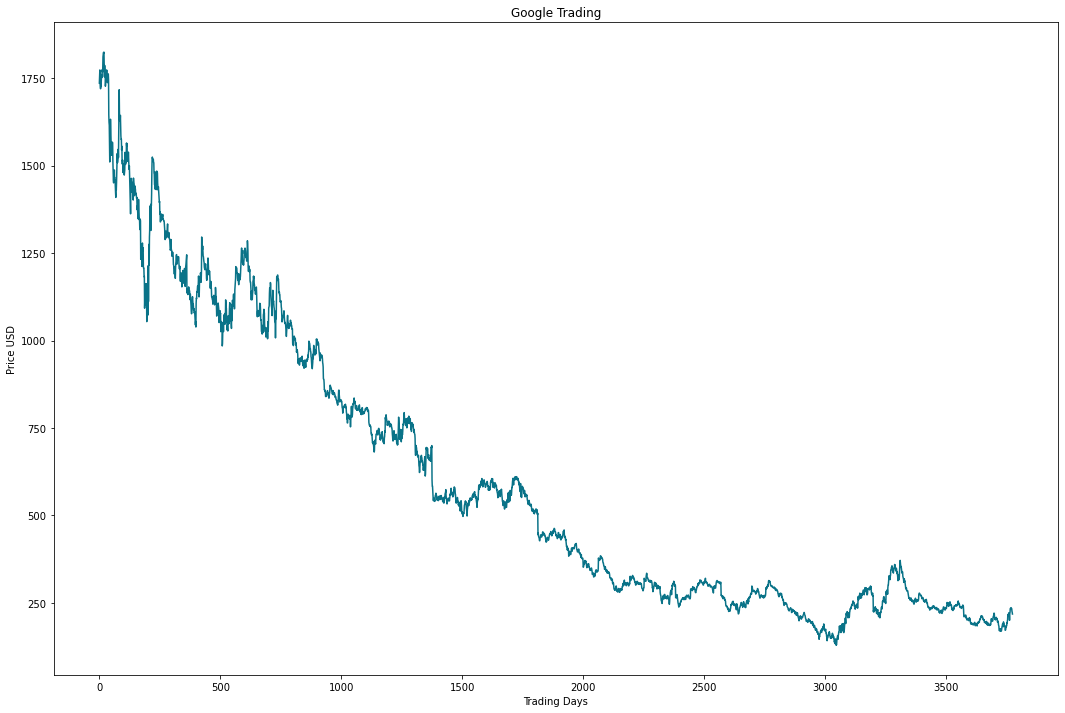

In [5]:
import visualize

visualize.plot_basic(stocks)

**Step 4 :** Add more features

In [6]:
import technical_indicators as ti

In [7]:
stocks = ti.calTechnicalIndicator(stocks)

3750


In [8]:
# Check for highly-correlated features
stocks.columns
corrMatrix = stocks.corr()
corrMatrix

,Item,Open,Close,Volume,High,Low,PCT_CHANGE,MACD,SMA,EMA,TR,ATR,MA,BB_UP,BB_DOWN,BB_RANGE,RSI,ADX
Item,1.000000,-0.927266,-0.927242,0.674614,-0.926890,-0.927609,0.013556,-0.928276,0.033548,0.032700,-0.607146,-0.717927,-0.928115,-0.926204,-0.929264,-0.490747,0.076379,0.094922
Open,-0.927266,1.000000,0.999722,-0.528806,0.999880,0.999835,0.001580,0.999055,0.002065,0.002267,0.685924,0.830643,0.998631,0.998375,0.997991,0.578477,-0.012792,-0.125446
Close,-0.927242,0.999722,1.000000,-0.529364,0.999853,0.999869,0.002847,0.999266,0.002520,0.003357,0.684884,0.830221,0.998835,0.998566,0.998207,0.578240,-0.012141,-0.125235
Volume,0.674614,-0.528806,-0.529364,1.000000,-0.526807,-0.531759,0.023211,-0.530914,0.078001,0.070664,-0.233390,-0.316916,-0.531092,-0.528017,-0.533816,-0.225286,0.122726,-0.020623
High,-0.926890,0.999880,0.999853,-0.526807,1.000000,0.999791,0.001905,0.999149,0.002649,0.003017,0.689841,0.833541,0.998720,0.998504,0.998037,0.579670,-0.012218,-0.125459
Low,-0.927609,0.999835,0.999869,-0.531759,0.999791,1.000000,0.001143,0.999210,0.001500,0.001775,0.680622,0.827101,0.998788,0.998464,0.998218,0.576658,-0.013036,-0.125376
PCT_CHANGE,0.013556,0.001580,0.002847,0.023211,0.001905,0.001143,1.000000,-0.015641,0.443799,0.745897,0.080675,0.035669,-0.017742,-0.016835,-0.018672,0.015014,0.323359,-0.025056
MACD,-0.928276,0.999055,0.999266,-0.530914,0.999149,0.999210,-0.015641,1.000000,-0.024515,-0.025574,0.680658,0.824517,0.999920,0.999513,0.999436,0.575000,-0.036303,-0.121272
SMA,0.033548,0.002065,0.002520,0.078001,0.002649,0.001500,0.443799,-0.024515,1.000000,0.863346,0.075766,0.085867,-0.032561,-0.031110,-0.034043,0.021550,0.649946,-0.105486
EMA,0.032700,0.002267,0.003357,0.070664,0.003017,0.001775,0.745897,-0.025574,0.863346,1.000000,0.092490,0.084358,-0.032146,-0.030538,-0.033794,0.026216,0.650677,-0.099601


In [9]:
upper = corrMatrix.where(np.triu(np.ones(corrMatrix.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]
to_drop = [column for column in to_drop if (column != 'Close')]
to_drop

['High', 'Low', 'MACD', 'MA', 'BB_UP', 'BB_DOWN']

In [10]:
stocks.drop(columns=to_drop, inplace=True)
to_keep = stocks.columns

**Step 7:** Log the normalised data for future resuablilty

In [11]:
stocks.to_csv('google_preprocessed.csv',index= False)

# Check Point #2

This is my second checkpoint. The preprocessed data has been saved to disk.

## Bench Mark Model

In this section we will check our bench mark model. As is proposed in my proposal my bench mark model is a simple linear regressor model. 

**Step 1:** Load the preprocessed data

In [12]:
import math
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import TimeSeriesSplit

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
display(stocks.head())

,Item,Open,Close,Volume,PCT_CHANGE,SMA,EMA,TR,ATR,BB_RANGE,RSI,ADX
0,52,1544.500000,1555.469971,1560500,-0.007801,-0.006325,-0.002012,20.049927,45.730487,146.182554,39.421468,21.006457
1,53,1574.599976,1563.439941,1658700,0.005124,-0.002728,0.000367,30.270020,45.893488,123.826640,40.746484,21.185233
2,54,1577.010010,1567.069946,1953600,0.002322,0.002139,0.001019,37.949951,46.798987,99.338856,41.375435,21.311811
3,55,1538.000000,1564.589966,2767200,-0.001583,0.004547,0.000152,26.530029,45.962488,77.301478,41.054814,21.964644
4,56,1492.859985,1510.449951,1648300,-0.034603,-0.007308,-0.011433,59.119995,45.951489,58.931736,34.728002,23.222866


**Step 2:** Split data into train and test pair

In [13]:
X_train, X_test, y_train, y_test, label_range= sd.train_test_split_linear_regression(stocks)

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

x_train (2551, 1)
y_train (2551, 1)
x_test (1172, 1)
y_test (1172, 1)


**Step 3:** Train a Linear regressor model on training set and get prediction

In [14]:
model = LinearRegressionModel.build_model(X_train,y_train)

**Step 4:** Get prediction on test set

In [15]:
predictions = LinearRegressionModel.predict_prices(model,X_test, label_range)

**Step 5:** Plot the predicted values against actual

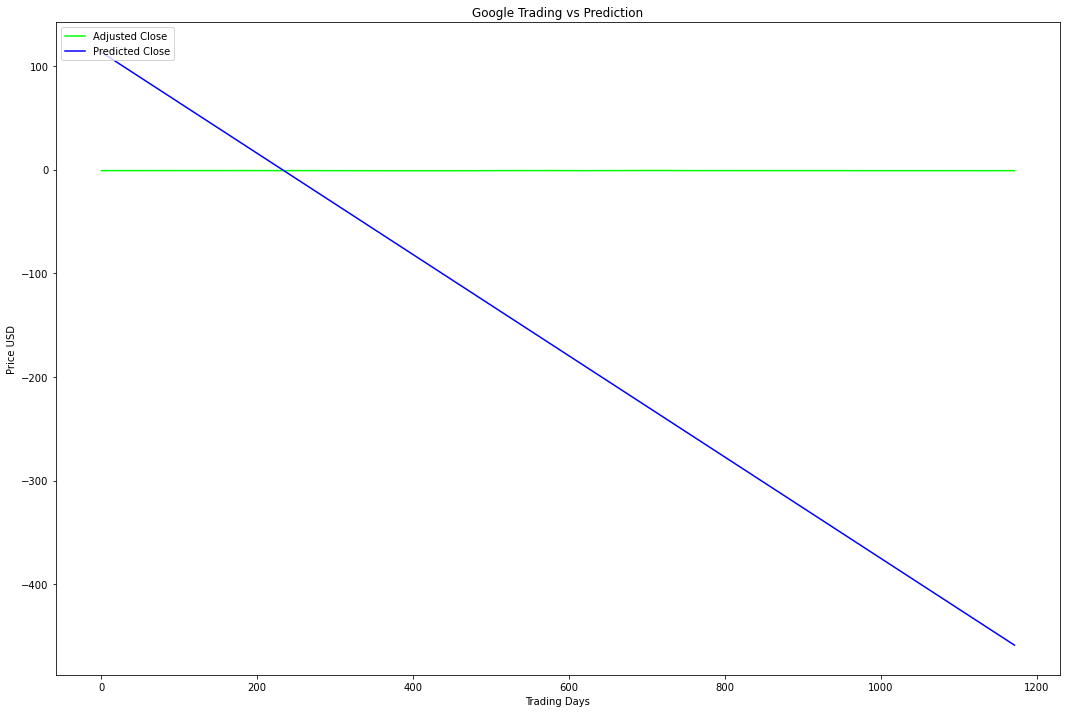

In [16]:
vs.plot_prediction(y_test,predictions)

**Step 6:** measure accuracy of the prediction

In [17]:
trainScore = mean_squared_error(X_train, y_train)
print('Train Score: %.4f MSE (%.4f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = mean_squared_error(predictions, y_test)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

Train Score: 0.7381 MSE (0.8591 RMSE)
Test Score: 56869.24958284 MSE (238.47274390 RMSE)


# Checkpoint #3


## Long-Sort Term Memory Model

In this section we will use LSTM to train and test on our data set.

### Basic LSTM Model

First lets make a basic LSTM model.

**Step 1 :** import keras libraries for smooth implementaion of lstm 

In [3]:
import math
import pandas as pd
import numpy as np
from IPython.display import display

from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold

import lstm, time #helper libraries

import visualize as vs
import stock_data as sd
import LinearRegressionModel

stocks = pd.read_csv('google_preprocessed.csv')
stocks_data = stocks.drop(['Item'], axis =1)

display(stocks_data.head())

,Open,Close,Volume,PCT_CHANGE,SMA,EMA,TR,ATR,BB_RANGE,RSI,ADX
0,1544.500000,1555.469971,1560500,-0.007801,-0.006325,-0.002012,20.049927,45.730487,146.182554,39.421468,21.006457
1,1574.599976,1563.439941,1658700,0.005124,-0.002728,0.000367,30.270020,45.893488,123.826640,40.746484,21.185233
2,1577.010010,1567.069946,1953600,0.002322,0.002139,0.001019,37.949951,46.798987,99.338856,41.375435,21.311811
3,1538.000000,1564.589966,2767200,-0.001583,0.004547,0.000152,26.530029,45.962488,77.301478,41.054814,21.964644
4,1492.859985,1510.449951,1648300,-0.034603,-0.007308,-0.011433,59.119995,45.951489,58.931736,34.728002,23.222866


**Step 2 :** Split train and test data sets and Unroll train and test data for lstm model

In [19]:
X_train, X_test,y_train, y_test, y_test_close = sd.train_test_split_lstm(stocks_data, 5)
print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)

X_train, X_test,y_train, y_test

x_train (3217, 11)
y_train (3217,)
x_test (496, 11)
y_test (496,)


(array([[1.54450000e+03, 1.55546997e+03, 1.56050000e+06, ...,
         1.46182554e+02, 3.94214677e+01, 2.10064575e+01],
        [1.57459998e+03, 1.56343994e+03, 1.65870000e+06, ...,
         1.23826640e+02, 4.07464838e+01, 2.11852328e+01],
        [1.57701001e+03, 1.56706995e+03, 1.95360000e+06, ...,
         9.93388561e+01, 4.13754354e+01, 2.13118107e+01],
        ...,
        [3.22827820e+02, 3.23688690e+02, 1.26557320e+07, ...,
         4.98471752e+01, 7.21138393e+01, 2.86833217e+01],
        [3.15335327e+02, 3.26926941e+02, 1.34659210e+07, ...,
         5.08582644e+01, 7.30907159e+01, 2.82482800e+01],
        [3.26826813e+02, 3.16156158e+02, 1.06675220e+07, ...,
         5.06742006e+01, 6.49418510e+01, 2.80485530e+01]]),
 array([[3.52817810e+02, 3.51616608e+02, 5.12027500e+06, ...,
         4.22798677e+01, 7.60092558e+01, 3.16996242e+01],
        [3.53888885e+02, 3.50720734e+02, 5.87911500e+06, ...,
         4.05330597e+01, 7.52096993e+01, 3.28262240e+01],
        [3.49844849e+02, 

**Step 3 :** Normalise the data

In [20]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
sc_Y = MinMaxScaler()
y_train = np.squeeze(sc_Y.fit_transform(y_train.reshape(-1, 1)))
y_test = np.squeeze(sc_Y.fit_transform(y_test.reshape(-1, 1)))

In [23]:
np.savetxt("X_train.csv", X_train, delimiter=",")
np.savetxt("X_test.csv", X_test, delimiter=",")
np.savetxt("y_train.csv", y_train, delimiter=",")
np.savetxt("y_test.csv", y_test, delimiter=",")

In [24]:
unroll_length = 50
X_train = sd.unroll(X_train, unroll_length)
X_test = sd.unroll(X_test, unroll_length)
y_train = y_train[-X_train.shape[0]:]
y_test = y_test[-X_test.shape[0]:]
y_test_close = y_test_close[-X_test.shape[0]:]

print("x_train", X_train.shape)
print("y_train", y_train.shape)
print("x_test", X_test.shape)
print("y_test", y_test.shape)
print("y_test_close", y_test_close.shape)

x_train (3167, 50, 11)
y_train (3167,)
x_test (446, 50, 11)
y_test (446,)
y_test_close (446,)


**Step 3 :** Build a basic Long-Short Term Memory model

In [25]:
# build basic lstm model
model = lstm.build_basic_model(input_dim = X_train.shape[-1],output_dim = unroll_length, return_sequences=True)

# Compile the model
start = time.time()
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

compilation time :  0.005789995193481445


**Step 4:** Train the model

In [26]:
model.fit(
    X_train,
    y_train,
    epochs=1,
    validation_split=0.05)

94/94 [==============================] - 5s 33ms/step - loss: 0.0306 - val_loss: 0.0093


**Step 5:** make prediction using test data

In [27]:
predictions = model.predict(X_test)

**Step 6:** Plot the results

In [28]:
import matplotlib.pyplot as plt

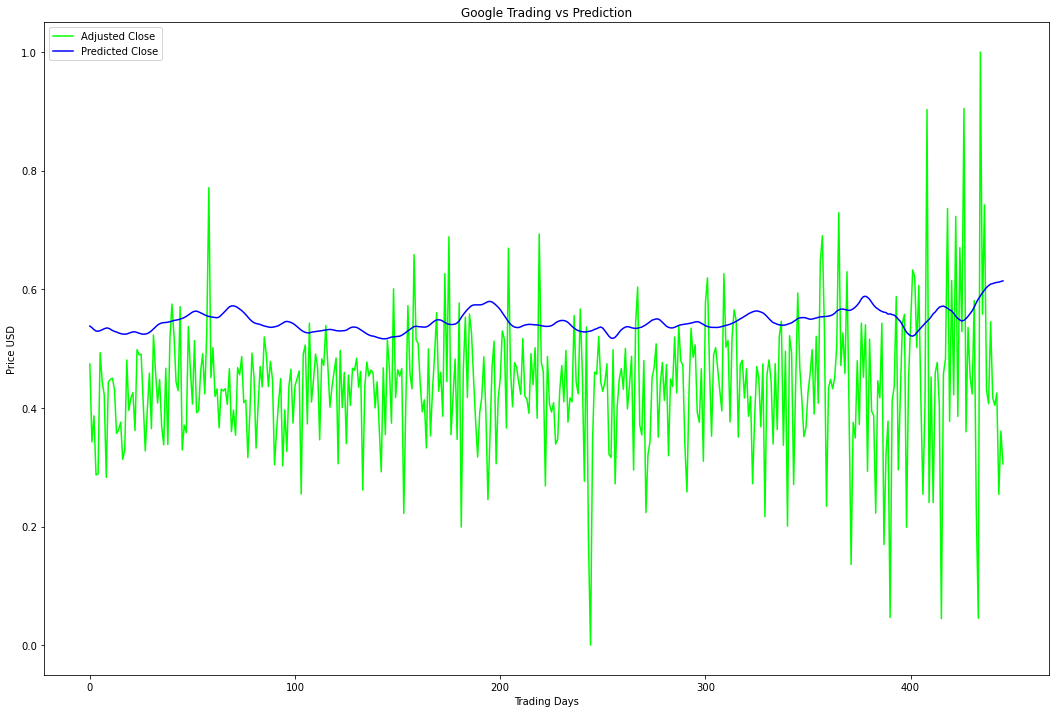

In [29]:
vs.plot_lstm_prediction(y_test,predictions)


In [30]:
y_test.size, predictions.size

(446, 446)

In [31]:
flatten_prediction = (predictions + 1).flatten()

In [32]:
flatten_prediction.size, y_test_close.size

(446, 446)

In [33]:
predicted_close = np.multiply(flatten_prediction,  y_test_close) 
predicted_close

array([481.42927845, 472.73699467, 467.48398351, 454.83605658,
       443.20028434, 447.34531585, 448.02285918, 447.13058253,
       435.73673178, 435.87320599, 435.8706461 , 435.89270621,
       434.7103693 , 428.33383736, 422.38158959, 417.48062786,
       408.4557447 , 400.76772287, 403.50712566, 400.81821816,
       399.51653484, 398.75855988, 393.54534769, 396.97926194,
       399.85815483, 402.83999964, 400.6629678 , 393.15993612,
       390.44960836, 392.05422529, 387.77838617, 393.87456113,
       396.11130344, 394.71282821, 395.69825866, 391.32476758,
       384.74442275, 386.44241519, 379.97502328, 384.82245603,
       393.62970095, 399.25916478, 399.59721604, 398.99958465,
       407.84018512, 400.55621426, 396.26484983, 391.32838137,
       398.18246563, 400.29357053, 398.60661961, 403.7539702 ,
       400.49048139, 397.13712695, 398.11231459, 400.9892793 ,
       399.34350411, 404.88449807, 426.77088201, 427.29086469,
       431.38430125, 429.69389945, 428.91933854, 423.96

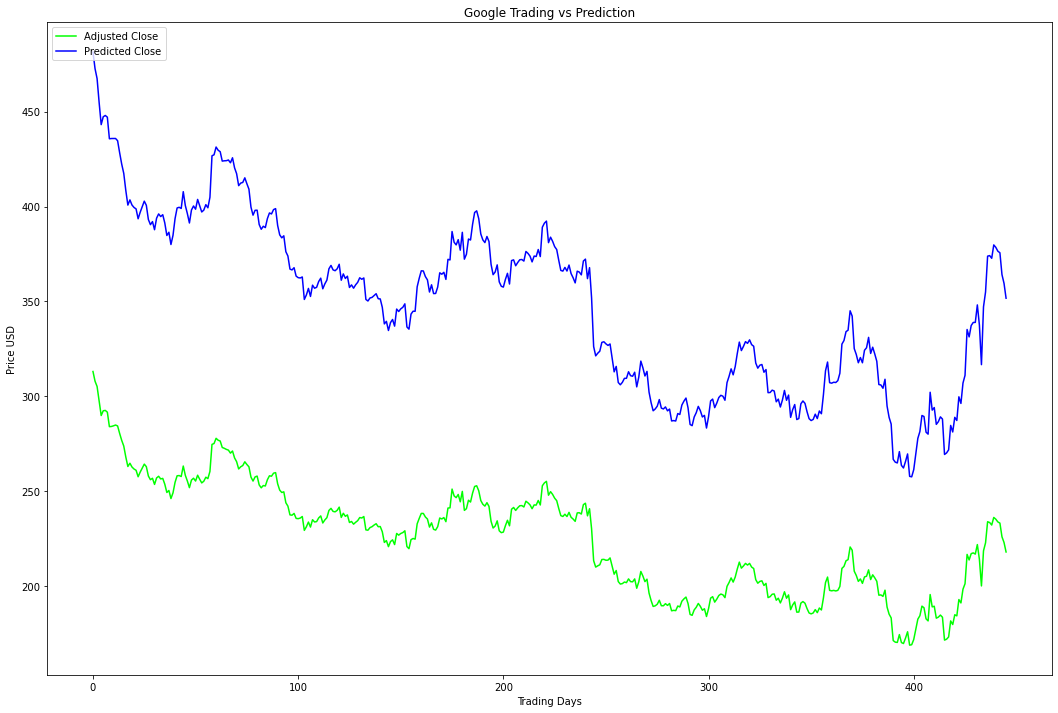

In [34]:
vs.plot_lstm_prediction(y_test_close, predicted_close)

In [ ]:
plt.plot(y_test)

In [ ]:
plt.plot(predictions)

**Step 7:** Get the test score.

In [ ]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

### Improved LSTM Model

**Step 1:** Build an improved LSTM model

In [ ]:
# Set up hyperparameters
batch_size = 100
epochs = 10

# build improved lstm model
model = lstm.build_improved_model( X_train.shape[-1],output_dim = unroll_length, return_sequences=True)
start = time.time()

#final_model.compile(loss='mean_squared_error', optimizer='adam')
model.compile(loss='mean_squared_error', optimizer='adam')
print('compilation time : ', time.time() - start)

**Step 2:** Train improved LSTM model

In [ ]:
history = model.fit(X_train, 
          y_train, 
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_split=0.15
         )

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Choose epoch based on val_loss
# model.fit(X_train, 
#           y_train, 
#           batch_size=batch_size,
#           epochs=10,
#           verbose=2,
#           validation_split=0.15
#          )

**Step 3:** Make prediction on improved LSTM model

In [ ]:
# Generate predictions 
predictions = model.predict(X_test, batch_size=batch_size)

**Step 4:** plot the results

In [ ]:
vs.plot_lstm_prediction(y_test,predictions)

In [ ]:
plt.plot(y_test)

In [ ]:
plt.plot(predictions)

**Step 5:** Get the test score

In [ ]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.8f MSE (%.8f RMSE)' % (trainScore, math.sqrt(trainScore)))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.8f MSE (%.8f RMSE)' % (testScore, math.sqrt(testScore)))

In [ ]:
range = [np.amin(stocks_data['Close']), np.amax(stocks_data['Close'])]

#Calculate the stock price delta in $

true_delta = testScore*(range[1]-range[0])
print('Delta Price: %.6f - RMSE * Adjusted Close Range' % true_delta)    

**Step 6:** Save the model

In [ ]:
model.save('model')

# Checking Robustness of the model

In this section we will check robustness of our LSTM model. I have used new unseen datasets for this from July 1, 2017 to July 20,2017. I have downloaded the data sets from google finance website to check for robustness of the model.

In [ ]:
import preprocess_data as ppd

new_data = yf.download('GOOGL','2021-01-01','2021-05-31') # from January 1, 2021 to May 31, 2021

In [ ]:
stocks = ppd.remove_data(new_data)

stocks = ti.calTechnicalIndicator(stocks)

stocks = stocks[to_keep]

stocks = ppd.get_normalised_data(stocks)

stocks = stocks.drop(['Item'], axis = 1)
#Print the dataframe head and tail
print(stocks.head())

X = stocks[:].values
Y = stocks[:]['Close'].values

X = sd.unroll(X,1)
Y = Y[-X.shape[0]:]


print(X.shape)
print(Y.shape)

# Generate predictions 
predictions = model.predict(X)

#get the test score
testScore = model.evaluate(X, Y, verbose=0)
print('Test Score: %.4f MSE (%.4f RMSE)' % (testScore, math.sqrt(testScore)))

In [ ]:
vs.plot_lstm_prediction(Y,predictions)